Text(0.5, 0.5, 'heat loss')

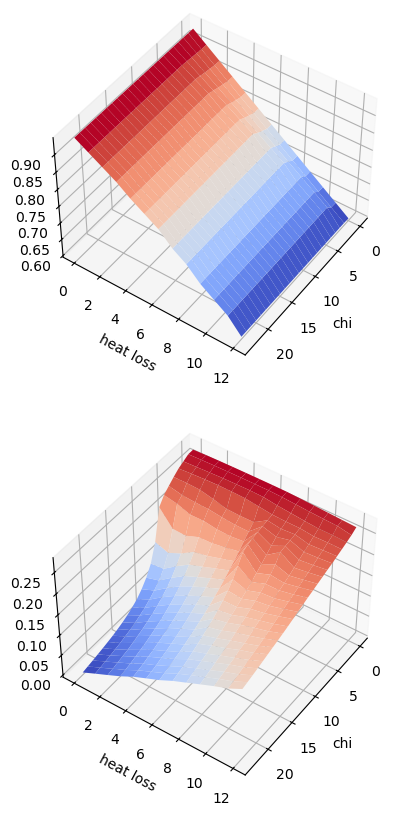

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
from scipy.interpolate import interp1d
from scipy.interpolate import RegularGridInterpolator as RGI
from scipy.interpolate import LinearNDInterpolator as LNDI
from scipy.interpolate import RectBivariateSpline as RBS
from scipy.optimize import fsolve

#####################

nf = 102
nX= 24             # number of chi values
nG = 13            # number of heat loss values (G for gamma)

fgrid = np.linspace(0,1,nf)              # table coordinates
Xgrid = np.arange(nX, dtype=np.float64)  # parametric, not actual χ
Ggrid = np.arange(nG, dtype=np.float64)  # parametric, not actual G
#Ggrid = np.linspace(0.0,0.6,nG)

c = np.zeros((nf, nX, nG))
h = np.zeros((nf, nX, nG))
T = np.zeros((nf, nX, nG))

###################################

for iL in range(nX):
    for it in range(nG):
        fname = "flm_" + str(iL).zfill(2) + '_' + str(it).zfill(2) + ".dat"
        data = np.loadtxt(fname)

        ii = interp1d(data[:,1], data[:,4])       # mixf, c
        c[:,iL, it] = ii(fgrid)

        ii = interp1d(data[:,1], data[:,3])       # mixf, h
        h[:,iL, it] = ii(fgrid)

        ii = interp1d(data[:,1], data[:,2])       # mixf, T
        T[:,iL, it] = ii(fgrid)

#####################

hmax = np.max(h)
hmin = np.min(h)
h = (h-hmin)/(hmax-hmin)

#####################

cI = RGI((fgrid, Xgrid, Ggrid), c, bounds_error=False, fill_value=None, method='linear')      # call as cI([fvalue, Lvalue, tvalue])
hI = RGI((fgrid, Xgrid, Ggrid), h, bounds_error=False, fill_value=None, method='linear')      
TI = RGI((fgrid, Xgrid, Ggrid), T, bounds_error=False, fill_value=None, method='linear')

#####################

XX,GG = np.meshgrid(Xgrid, Ggrid)

imixf = 6

fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(2,1,1, projection='3d')
ax1.plot_surface(XX, GG, h[imixf,:,:].T, cmap=cm.coolwarm)
ax1.view_init(45,35)
ax1.set_xlabel('chi')
ax1.set_ylabel('heat loss')

ax2 = fig.add_subplot(2,1,2, projection='3d')
ax2.plot_surface(XX, GG, c[imixf,:,:].T, cmap=cm.coolwarm)
ax2.view_init(45,35)
ax2.set_xlabel('chi')
ax2.set_ylabel('heat loss')

#####################

